# Predicting House Prices with Neural Networks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as le
l=le()

In [3]:
data=pd.read_csv('Housing.csv')
data.head(4)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished


In [4]:
data['mainroad']=l.fit_transform(data['mainroad'])
data['guestroom']=l.fit_transform(data['guestroom'])
data['basement']=l.fit_transform(data['basement'])
data['hotwaterheating']=l.fit_transform(data['hotwaterheating'])
data['airconditioning']=l.fit_transform(data['airconditioning'])
data['prefarea']=l.fit_transform(data['prefarea'])
data['furnishingstatus']=l.fit_transform(data['furnishingstatus'])
data.head(4)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int32
 6   guestroom         545 non-null    int32
 7   basement          545 non-null    int32
 8   hotwaterheating   545 non-null    int32
 9   airconditioning   545 non-null    int32
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int32
 12  furnishingstatus  545 non-null    int32
dtypes: int32(7), int64(6)
memory usage: 40.6 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
mainroad,545.0,8.587156e-01,3.486347e-01,0.0,1.0,1.0,1.0,1.0
guestroom,545.0,1.779817e-01,3.828487e-01,0.0,0.0,0.0,0.0,1.0
basement,545.0,3.504587e-01,4.775519e-01,0.0,0.0,0.0,1.0,1.0
hotwaterheating,545.0,4.587156e-02,2.093987e-01,0.0,0.0,0.0,0.0,1.0
airconditioning,545.0,3.155963e-01,4.651799e-01,0.0,0.0,0.0,1.0,1.0


In [8]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [11]:
x=data.iloc[:,1:5]
y=data.iloc[:,:1]

from sklearn.model_selection import train_test_split as tts

x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=5)


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = x_train.columns
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

In [18]:
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

# Neural network -> Sequencial Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2433 (9.50 KB)
Trainable params: 2433 (9.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile & Fit the model

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [24]:
history=model.fit(x_train, y_train,
                  epochs=50,
                  batch_size=32,
                  validation_data=(x_test,y_test),
                  validation_split=0.2)
score=model.evaluate(x_test, y_test)


Epoch 1/50
14/14 [==============================] - 0s 8ms/step - loss: 27420438560768.0000 - mae: 4865916.0000 - val_loss: 21168337715200.0000 - val_mae: 4350050.0000
Epoch 2/50
14/14 [==============================] - 0s 5ms/step - loss: 27417754206208.0000 - mae: 4865674.5000 - val_loss: 21166083276800.0000 - val_mae: 4349829.0000
Epoch 3/50
14/14 [==============================] - 0s 5ms/step - loss: 27414790930432.0000 - mae: 4865416.0000 - val_loss: 21163837227008.0000 - val_mae: 4349606.0000
Epoch 4/50
14/14 [==============================] - 0s 5ms/step - loss: 27411875889152.0000 - mae: 4865159.5000 - val_loss: 21161440182272.0000 - val_mae: 4349371.5000
Epoch 5/50
14/14 [==============================] - 0s 4ms/step - loss: 27408744841216.0000 - mae: 4864885.5000 - val_loss: 21159028457472.0000 - val_mae: 4349132.5000
Epoch 6/50
14/14 [==============================] - 0s 4ms/step - loss: 27405620084736.0000 - mae: 4864608.5000 - val_loss: 21156480417792.0000 - val_mae: 43488

14/14 [==============================] - 0s 5ms/step - loss: 27150367326208.0000 - mae: 4842201.0000 - val_loss: 20955640365056.0000 - val_mae: 4329168.0000
Epoch 50/50
4/4 [==============================] - 0s 3ms/step - loss: 20948480688128.0000 - mae: 4328468.5000


In [25]:
print(f"\nLoss on Test Set: {score[0]}")
print(f"\n\nMean Absolute Error on Test Set: {score[1]}")


Loss on Test Set: 20948480688128.0


Mean Absolute Error on Test Set: 4328468.5


# Visualization

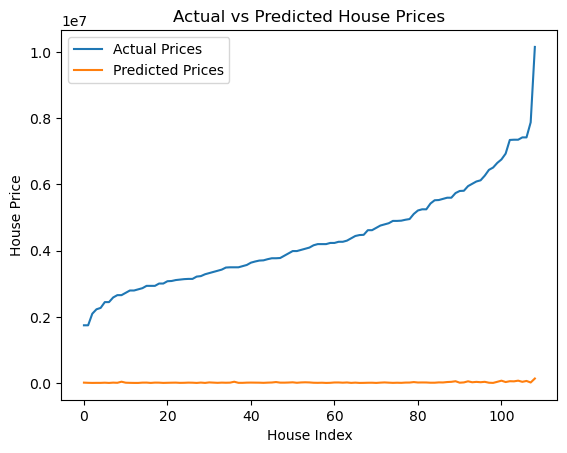

In [27]:
house_indices = np.arange(len(y_test_flat))
sorted_indices = np.argsort(y_test_flat)

plt.plot(house_indices, y_test_flat[sorted_indices], label='Actual Prices')
plt.plot(house_indices, y_pred[sorted_indices], label='Predicted Prices')

plt.xlabel('House Index')
plt.ylabel('House Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()


4/4 [==============================] - 0s 2ms/step


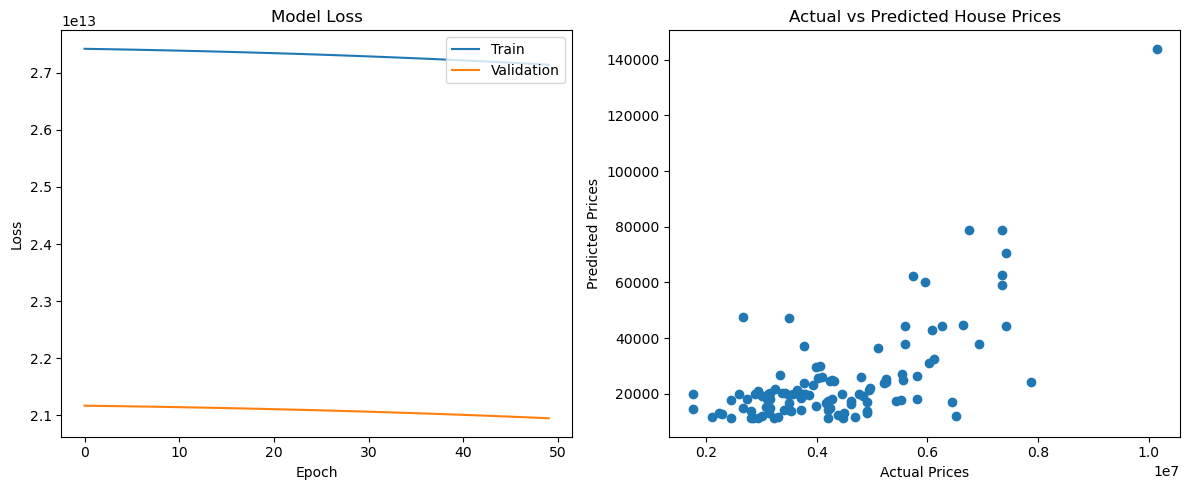

In [30]:
# Visualize Training History
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Visualize Actual vs Predicted Prices
y_pred = model.predict(x_test).flatten()

plt.subplot(1, 2, 2)
plt.scatter(y_test.values.flatten(), y_pred)
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()
